In [15]:
from astropy.coordinates import SkyCoord
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.time

In [87]:
# Objects with the same RA and Dec, a range of proper motion values in RA, and zero proper motion in Dec:
testPM_RA = np.arange(-5e-5, 5e-5, 1e-6) * (u.radian/u.yr)
testPM_Dec = np.zeros(len(testPM)) * (u.radian/u.yr)
testRA = 180 * np.ones(len(testPM)) * u.degree
testDec = 0 * np.ones(len(testPM)) * u.degree 

In [66]:
epoch = astropy.time.Time(58206.861330339219, scale="tai", format="mjd")

In [77]:
cat = SkyCoord(testRA, testDec,
               pm_ra_cosdec=testPM_RA, pm_dec=testPM_Dec,
               obstime=epoch)

In [86]:
# Shift the objects by one year
cat_pm = cat.apply_space_motion(epoch + 1 * u.yr)

In [85]:
# Make a simple model for the effect of proper motion
linearRA = testRA + testPM_RA * u.yr

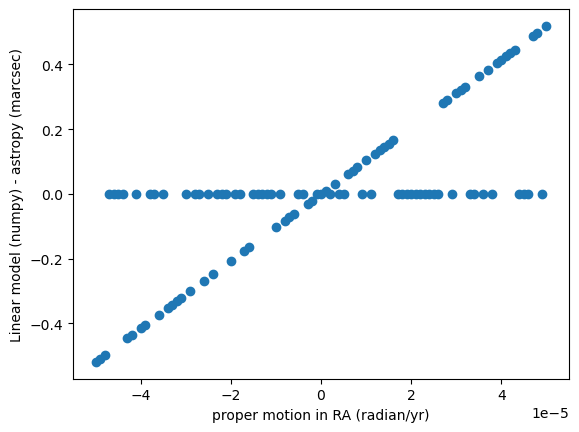

In [81]:
plt.scatter(cat.pm_ra_cosdec.to(u.radian / u.yr).value, (linearRA - cat_pm.ra).to(u.marcsec).value)
plt.xlabel('proper motion in RA (radian/yr)')
plt.ylabel('Linear model (numpy) - astropy (marcsec)')
plt.savefig("astropy_pm_demo.png")

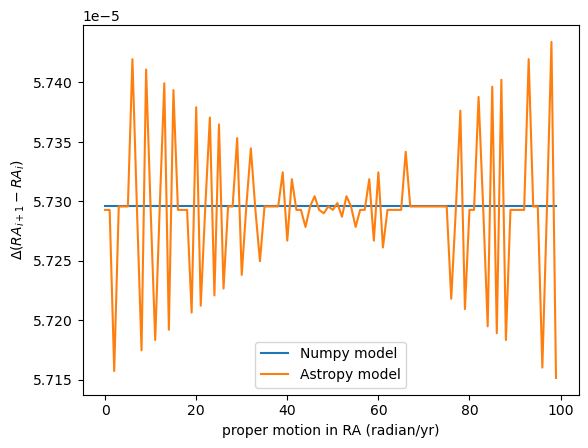

In [84]:
# Regardless of which is correct, the effect of proper motion should be a smooth function of PM_RA. 
# Looking at np.diff() shows that it is not smooth for the astropy results
plt.plot(np.diff(linearRA), label='Numpy model')
plt.plot(np.diff(cat_pm.ra), label='Astropy model')
plt.xlabel('proper motion in RA (radian/yr)')
plt.ylabel('$\Delta(RA_{i+1} - RA_{i})$')
plt.legend()
plt.savefig("astropy_pm_dra_demo.png")

In [72]:
(linearRA - cat_pm.ra).to(u.marcsec).value

array([-5.18718764e-01, -5.08293567e-01, -4.97870315e-01, -7.16227078e-06,
       -6.65068001e-06, -6.34372554e-06, -5.83213478e-06, -4.45785668e-01,
       -4.35375000e-01, -4.80895324e-06, -4.14559906e-01, -4.04155480e-01,
       -3.68345354e-06, -3.58113539e-06, -3.72954582e-01, -2.96722646e-06,
       -3.52164352e-01, -3.41772409e-01, -3.31382512e-01, -3.20994764e-01,
       -1.84172677e-06, -3.00225304e-01, -1.43245416e-06, -1.33013600e-06,
       -2.69086718e-01, -1.12549969e-06, -2.48338131e-01, -8.18545232e-07,
       -7.16227078e-07, -7.16227078e-07, -2.06865616e-01, -5.11590770e-07,
       -4.09272616e-07, -1.75783100e-01, -1.65426354e-01, -2.04636308e-07,
       -1.02318154e-07, -2.04636308e-07, -1.02318154e-07, -1.02318154e-07,
       -1.03329467e-01, -1.02318154e-07, -8.26469773e-02, -7.23089556e-02,
       -6.19728780e-02, -1.02318154e-07,  0.00000000e+00, -3.09771281e-02,
       -2.06493382e-02,  0.00000000e+00,  0.00000000e+00,  1.03239017e-02,
        1.02318154e-07,  